## Qiskit Implementation of Grover's Algorithm


we will use two qubits to find the state $|11\rangle$.

In [1]:

#importing Python libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit libraries
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import libraries to plot 
from qiskit.tools.visualization import plot_histogram

Let Us create an Oracle

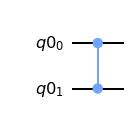

In [2]:
def phase_oracle(circuit, register):  ## defining a Function phase_oracle  that take inputs the circuit and the register
    circuit.cz(register[0], register[1])   ##making the CNot gate on the Z axis

qr = QuantumRegister(2)  ## a two qubit quantum register
oracleCircuit = QuantumCircuit(qr)  ## naming the Circuit as oracle Circuit 
phase_oracle(oracleCircuit, qr) ## calling the phase_oracle function
oracleCircuit.draw(output="mpl")

set up the circuit for inversion about the average. This circuit is sometimes called an amplitude ampification module or a diffusion circuit.

In [3]:

def inversion_about_average(circuit, register):  ## defining a Function to invert the amplitude of our desired state

    circuit.h(register)  ## applying the Hadamard gate on both the register
    circuit.x(register) ## applying the NOT gate on both the register
    circuit.h(register[1]) ## applying the Hadamard gate on the second register
    circuit.cx(register[0], register[1]) ## applying the CNOT gate on register 0 and getting its output on register 1
    circuit.h(register[1]) ## applying the Hadamard gate on register 1
    circuit.x(register) ##applying the NOT gate on both the register
    circuit.h(register) ## applying thr Hadamard gate on both the register

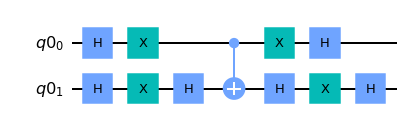

In [4]:
### drawing the Circuit
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage, qr)
qAverage.draw(output='mpl')

### Putting the Pieces together 

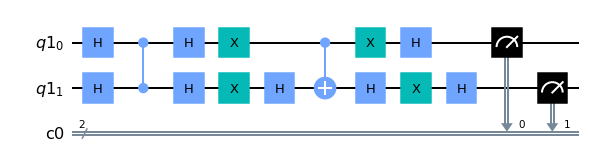

In [5]:
qr = QuantumRegister(2) ## making the Quantum Circuit
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr,cr) ## naming the Circuit as grover Circuit
groverCircuit.h(qr) ## applying an Hadamard gate on the quantum register

phase_oracle(groverCircuit, qr) ## applying the phase oracle circuit
inversion_about_average(groverCircuit, qr) ## inverting the amplitude

groverCircuit.measure(qr,cr) ## measuring the output
groverCircuit.draw(output="mpl") ## drawing the circuit

## Running on a Simulator

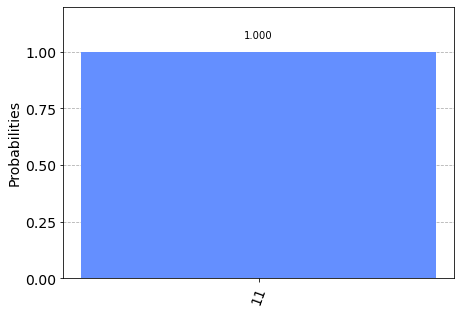

In [6]:
backend = BasicAer.get_backend('qasm_simulator')  ## running it on a QASM Simulator
shots = 1024 ## no of shots we are sending
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts() ## collecting the results
plot_histogram(answer)

## Doing it on a Real Quantum Computer

In [7]:
IBMQ.load_account()  ## loading our IBM Quantum Computer Account
provider = IBMQ.get_provider(hub='ibm-q')
backend_lb = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
## finding the least busy Quantum computer 
print("Least busy backend: ", backend_lb)
## print the least busy quantum computer 

C:\Users\Monit Sharma\Documents\Anaconda\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Least busy backend:  ibmq_ourense


In [8]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

backend = backend_lb
shots = 1024
job_exp = execute(groverCircuit, backend=backend, shots=shots)  ## run the job on the quantum Computer

job_monitor(job_exp, interval = 2)

Job Status: job has successfully run


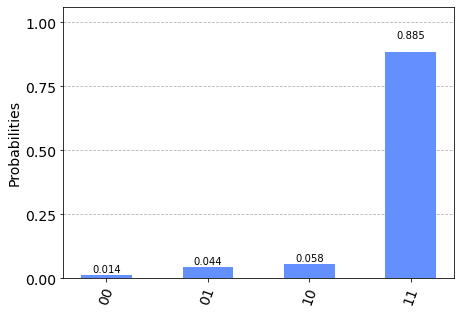

In [9]:
results = job_exp.result()
answer = results.get_counts(groverCircuit)
plot_histogram(answer) ##plot the output we got from the actual Quantum Computer

We are getting the desired output 88% of times

## Grover's Algorithm on Auxillary Bits

We are going to find the state $|11\rangle$ just like in the previous example, but this time we will use an auxiliary bit. Auxiliary bits let you work with more qubits or implement more complex oracles.

In [10]:
# Importing the Necessary Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram


We will create an oracle that will flip the phase of the answer we are looking for ( in this case $|11\rangle$ ). This time, using the auxiliary bit to make the target bit's phase flip when the input state is $|11\rangle$ . Note that in order to make this phase flip work, you need to prepare the auxiliary bit to be $|1\rangle$ by using an x gate.

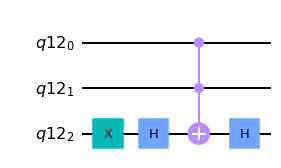

In [11]:

def phase_oracle(circuit, register,oracle_register):  ## defining the oracle function
    circuit.h(oracle_register)
    circuit.ccx(register[0], register[1],oracle_register) ## defining the circuits
    circuit.h(oracle_register)
    
qr = QuantumRegister(3)  ## making a 3 qubit Quantum Register
oracleCircuit = QuantumCircuit(qr) ## naming the quantum circuit as oracle circuit
oracleCircuit.x(qr[2])  ## applying the  X gate  for the phase flip to work
phase_oracle(oracleCircuit, qr,qr[2])
oracleCircuit.draw(output="mpl")

The amplitude amplification module/diffusion circuit. Make sure that the circuit does not act on the auxiliary bit.

In [12]:

## applying the Circuit same as above

def inversion_about_average(circuit, register):
    
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

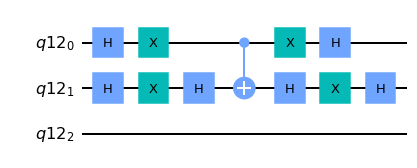

In [13]:
## plotting the Circuit
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage, qr[0:2])
qAverage.draw(output='mpl')

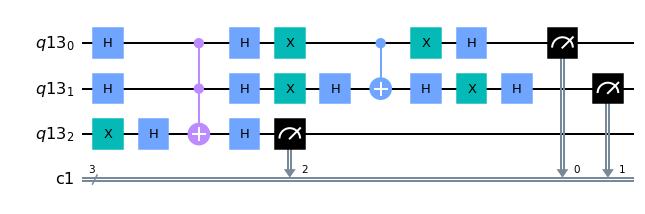

In [14]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr[0:2])
groverCircuit.x(qr[2])

phase_oracle(groverCircuit, qr,qr[2])
inversion_about_average(groverCircuit, qr[0:2])

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

## Running on the Simulator

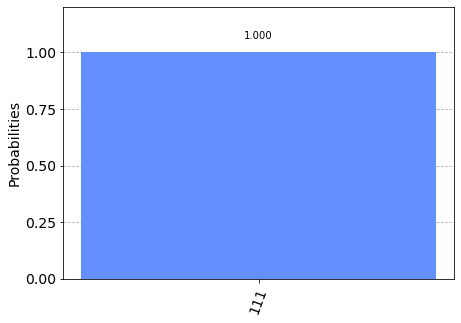

In [15]:

backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

## Number of Iterations

 The number of Grover algorithm iterations to be performed before the solution is fully amplified is approximately $\sqrt{N}$
 
When running Grover's algorithm on a database with $N = 2^4$, the probabilities obtained by changing the number of iterations are as follows.

In [16]:

backend = BasicAer.get_backend('qasm_simulator')
prob_of_ans = []

for x in range(12):
    database = QuantumRegister(4)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(2) 
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)
    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])


    for j in range(x):
    # oracle_4q
        # search 7: 0111 
        qc.x(database[0])
        qc.mct(database[:], oracle[0], auxiliary[:], mode='basic') 
        qc.x(database[0])

    # diffusion_4q
        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[3])
        qc.mct(database[0:3], database[3], auxiliary[:], mode='basic')
        qc.h(database[3])
        qc.x(database[:])
        qc.h(database[:])


    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database,cr)
    # Change the endian 
    qc = qc.reverse_bits() 
    
    job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})
    result = job.result()
    count = result.get_counts()
    answer = count['0111']
    prob_of_ans.append(answer)

Text(0, 0.5, '# of times the solution was obtained')

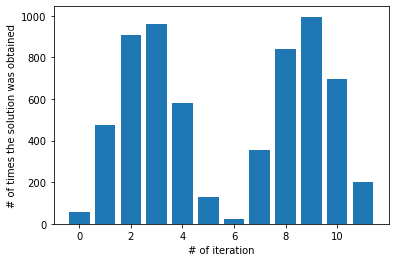

In [17]:
import numpy as np
import matplotlib.pyplot as plt
iteration = [i for i in range(12)]
correct = prob_of_ans
plt.bar(iteration, correct)
plt.xlabel('# of iteration')
plt.ylabel('# of times the solution was obtained')